In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")
execute_notebook("../../bin/plotting.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


Thresholding the inclusion of mutations based on their allelic fraction in patients <br>
The current threshold is removing those below the 25 percentile cutoff

In [8]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.low_allelic_fraction.TCGA.conservative.mut.csv',
                                index_col=0)

In [9]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.high_allelic_fraction.TCGA.conservative.mut.csv',
                                index_col=0)

Pan analysis

In [2]:
classes = ['class_i', 'class_ii']
all_dfs = []
for c in classes:
    for f, name in zip(['low_allelic_fraction.thresh_2.txt', 'high_allelic_fraction.thresh_2.txt'],
                       ['Low Allelic Fraction', 'High Allelic Fraction']): 
        tmp = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/pan/{0}/{1}'.format(c, f),
               sep=' ')
        tmp['Class'] = c
        tmp['Condition'] = name
        all_dfs.append(tmp)
pan = pd.concat(all_dfs)

In [3]:
pan

,OR,conf_OR_low,conf_OR_high,P,Class,Condition
mutation,1.159793,1.109019,1.212890,8.547575e-11,class_i,Low Allelic Fraction
mutation,1.287225,1.250858,1.324649,8.223198e-67,class_i,High Allelic Fraction
mutation,1.134842,1.080269,1.192172,4.888363e-07,class_ii,Low Allelic Fraction
mutation,1.294417,1.252572,1.337659,1.853564e-53,class_ii,High Allelic Fraction


In [13]:
pan['Error'] = pan['OR'] - pan['conf_OR_low']

In [23]:
c = 'class_ii'
var1 = pan[(pan.Class == c)&(pan.Condition == 'Low Allelic Fraction')]
var2 = pan[(pan.Class == c)&(pan.Condition == 'High Allelic Fraction')]

In [24]:
float(var2.OR) - float(var1.OR) > 1.96*sqrt((float(var1.Error)**2 + (float(var2.Error)**2)))

True

In [25]:
float(var2.OR) - float(var1.OR)

0.15957429624430008

In [26]:
1.96*sqrt((float(var1.Error)**2 + (float(var2.Error)**2)))

0.13478782134396378

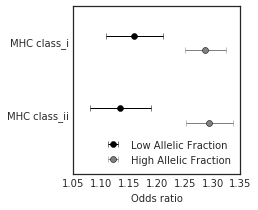

In [26]:
cat = 'Condition'
outfile = '/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/allelic_fraction.pan_OR.pdf'
cat_name1, cat_name2 = pan[cat].unique()    
pan['Error'] = pan['OR'] - pan['conf_OR_low']
#plt.axvline(1, color='lightgrey')
plt.figure(figsize=(3,3))
plt.errorbar(pan[pan[cat] == cat_name1].OR, [x + 0.1 for x in range(len(pan[pan[cat] == cat_name1]))[::-1]], 
             xerr=list(pan[pan[cat] == cat_name1].Error), fmt='o', 
             color='k', label=cat_name1)
plt.errorbar(pan[pan[cat] == cat_name2].OR, [x - 0.1 for x in range(len(pan[pan[cat] == cat_name2]))[::-1]], 
             xerr=list(pan[pan[cat] == cat_name2].Error), fmt='o', 
             color='grey', label=cat_name2)
plt.yticks([1, 0], ['MHC {0}'.format(x) for x in list(pan[pan[cat] == cat_name2].Class)])
plt.ylabel('')
plt.xlabel('Odds ratio')
plt.ylim(-0.8, 1.5)
plt.legend(loc=4, prop={'size': 10})
if outfile != None:
    plt.savefig(outfile, bbox_inches='tight')

Tissue analysis

In [16]:
df1 = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/tissue/class_ii/low_allelic_fraction.thresh_2.txt',
           sep=',')
df2 = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/tissue/class_ii/high_allelic_fraction.thresh_2.txt',
           sep=',')

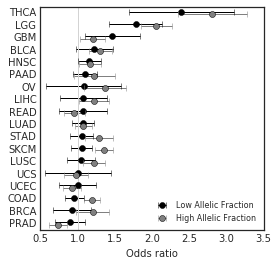

In [34]:
cat_name1 = 'Low Allelic Fraction'
cat_name2 = 'High Allelic Fraction'
outfile = '/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/allelic_fraction.tissue_OR.pdf'

df1['Error'] = df1['OR'] - df1['Lci']
df2['Error'] = df2['OR'] - df2['Lci']
ordered_tissues = df1.OR.sort_values(ascending=False).index
df1 = df1.ix[ordered_tissues]
df2 = df2.ix[ordered_tissues]

plt.figure(figsize=(4,4))
plt.axvline(1, color='lightgrey')
plt.errorbar(df1.OR, [x + 0.1 for x in range(len(df1))[::-1]], 
             xerr=list(df1.Error), fmt='o', 
             color='k', label=cat_name1)
plt.errorbar(df2.OR, [x - 0.1 for x in range(len(df2))[::-1]], 
             xerr=list(df2.Error), fmt='o', 
             color='grey', label=cat_name2)
plt.yticks(range(len(ordered_tissues))[::-1], list(ordered_tissues))
plt.ylabel('')
plt.ylim(-0.5, len(ordered_tissues)-0.5)
plt.legend(loc=4, prop={'size': 8})
plt.xlabel('Odds ratio')
if outfile != None:
    plt.savefig(outfile, bbox_inches='tight')

###Where are the low coverage mutations in the quadrants?

In [17]:
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv',
                               index_col=0)

In [4]:
patient_affinitiesI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassI.csv',
                               index_col=0)
patient_affinitiesII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv',
                              index_col=0)

In [5]:
def patient_fractions_dataframe(MHCI_cutoff, MHCII_cutoff, patient_affinitiesI, patient_affinitiesII, high_frequency_mutations):
    fractionsI, fractionsII = [], []
    mutation_count = []
    for mutation in high_frequency_mutations:
        fractionsI.append(len(patient_affinitiesI[mutation][patient_affinitiesI[mutation] < MHCI_cutoff]) / float(len(patient_affinitiesI)))
        fractionsII.append(len(patient_affinitiesII[mutation][patient_affinitiesII[mutation] < MHCII_cutoff]) / float(len(patient_affinitiesII)))
        #mutation_count.append(patient_mutations.sum().ix[mutation])
    df = pd.DataFrame({'Mutation': high_frequency_mutations,
                       'MHCI': fractionsI,
                       'MHCII': fractionsII})
    return df

In [9]:
low_AF = pd.read_csv('/cellar/users/ramarty/Data/hla/mutations/processed_mutation_files.low_allelic_fraction.csv',
                     index_col=0)

In [24]:
# maybe we need to judge by percentage of mutations that are low frequency
summary = pd.merge(pd.DataFrame(low_AF['combined'].value_counts()), 
          pd.DataFrame(patient_mutations.sum()), left_index=True, right_index=True)

In [26]:
summary.columns = ['low_AF', 'total']

In [27]:
summary['fraction_low_AF'] = summary.low_AF / summary.total

In [29]:
summary.sort_values('fraction_low_AF')

,low_AF,total,fraction_low_AF
TP53_E271K,1,12,0.083333
HRAS_Q61R,2,23,0.086957
TP53_E285K,1,11,0.090909
TP53_Y236C,1,10,0.100000
TP53_V173L,1,10,0.100000
PPP2R1A_R183W,1,10,0.100000
CIC_R215W,1,9,0.111111
TP53_A159V,1,9,0.111111
SPOP_W131G,1,8,0.125000
CTNNB1_S45F,1,8,0.125000


In [7]:
df = patient_fractions_dataframe(2, 10, patient_affinitiesI, patient_affinitiesII, list(patient_affinitiesII.columns))

In [8]:
df

,MHCI,MHCII,Mutation
0,0.182430,0.000000,EGFR_ifd_55174772
1,0.054022,0.000000,NOTCH1_ifd_136518618
2,0.652306,0.673847,PIK3R1_ifd_68295304
3,0.491417,0.089869,CTNNB1_ifd_41224643
4,0.101649,0.000000,PIK3R1_ifd_68293795
5,0.963649,0.960451,ERBB2_ifi_39724728
6,0.298553,0.000000,EGFR_ifd_55174773
7,0.237799,0.000000,PIK3R1_ifd_68293758
8,0.121508,0.000000,TP53_ifd_7675066
9,0.498149,0.063783,BRAF_ifd_140778037
